In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint
from tqdm import tqdm

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses import strong_lens
from mejiro.utils import util

In [2]:
pickled_lens_list = os.path.join(config.machine.dir_01, '01_hlwas_sim_detectable_lens_list')
lens_list = util.unpickle(pickled_lens_list)

In [3]:
vel_disp = [l.lens_vel_disp for l in lens_list]
vel_disp_calc = [strong_lens.einstein_radius_to_velocity_dispersion(l.get_einstein_radius(), l.z_lens, l.z_source, l.cosmo) for l in lens_list]
dif = [util.percent_difference(v, vc) for v, vc in zip(vel_disp, vel_disp_calc)]

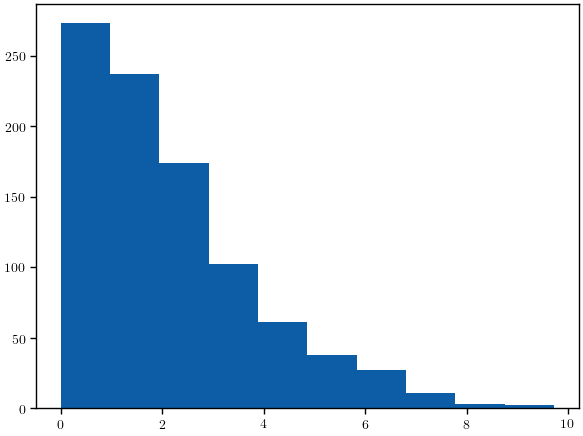

In [4]:
plt.hist(dif)
plt.show()

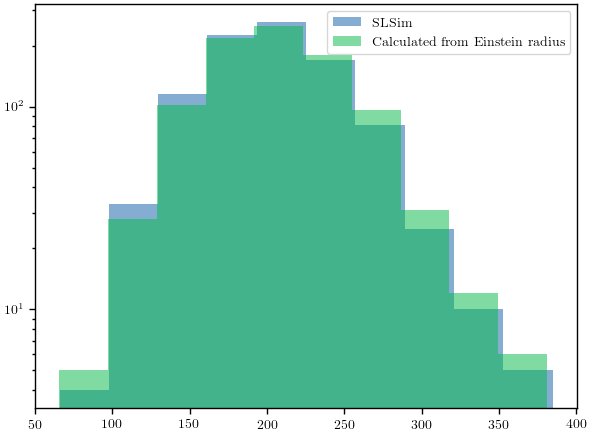

In [5]:
plt.hist(vel_disp, label='SLSim', alpha=0.5)
plt.hist(vel_disp_calc, label='Calculated from Einstein radius', alpha=0.5)
plt.yscale('log')
plt.legend()
plt.show()